# 项目简介
使用2022年11月1日0-40N，110E-150E区域逐小时10m风速资料wind20221101.nc

（1）绘制该区域2022年11月1日0时风场图

（2）使用u、v分量计算120E, 30N处的风向和风速，并绘制时间序列图

## 数据来源：
ERA5每小时数据：
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels

## 绘图要点：
(1)熟悉风场图的绘制，了解添加示意箭头、调整间距等方法

(2)会使用u、v分量计算风向和风速

## 配套视频链接：
【【鼠鼠】海洋科研绘图12：风场图&风向风速计算】 https://www.bilibili.com/video/BV1oP4y197hc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.pyplot import MultipleLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
#导入文件
filename = r'D:\bllibili\data\wind20221101.nc'
f = xr.open_dataset(filename)

#查看文件信息
print(f)

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 241, time: 24)
Coordinates:
  * longitude  (longitude) float32 110.0 110.2 110.5 110.8 ... 149.5 149.8 150.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2022-11-01 ... 2022-11-01T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-18 07:57:38 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
#提取数据
u = f['u10'].data
v = f['v10'].data
lat = f['latitude'].data
lon = f['longitude'].data
time = f['time'].data

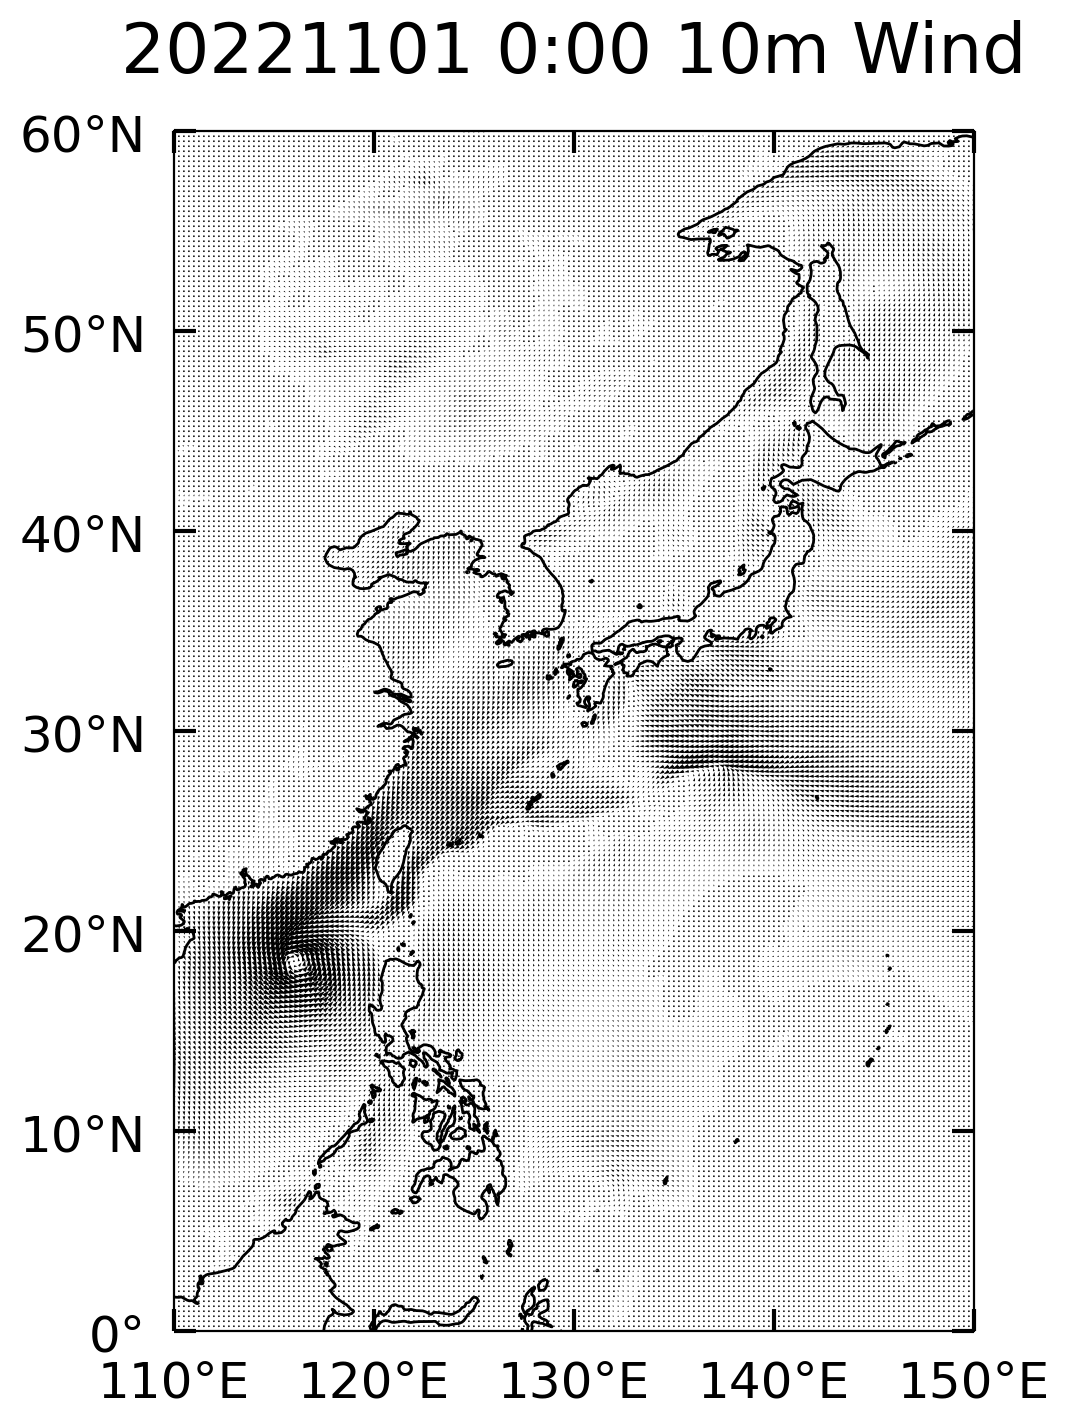

In [4]:
#【图1】0-40N，110E-150E区域区域2022年11月1日0时风场图
#画图网格
X,Y = np.meshgrid(lon,lat)

#figure和ax设置
fig = plt.figure(figsize=(6,8),dpi=200)
proj = ccrs.PlateCarree()
region=[110,150,0,60]
ax = plt.axes([0.125,0,0.75,0.75],projection=proj)
ax.set_extent(region,crs = proj)  #设置区域与需要画图的区域范围一致
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))  #海岸线

#风场图
u0 = u[0,:,:]  #取0时刻的u,v风速
v0 = v[0,:,:]
q = ax.quiver(X,Y,u0,v0,color='k')  #取0时刻的u,v风速

#刻度设置
ax.set_xticks(np.arange(110,160,10))  #指定要显示的经纬度
ax.set_yticks(np.arange(0,70,10))
ax.xaxis.set_major_formatter(LongitudeFormatter())  #刻度格式转换为经纬度样式
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(axis='x',top=True,which='major',direction='in',length=8,width=1.5,labelsize=18,pad=10)  #刻度样式
ax.tick_params(axis='y',right=True,which='major',direction='in',length=8,width=1.5,labelsize=18,pad=10)

#标题
plt.suptitle('20221101 0:00 10m Wind',fontsize=25,y=0.82)
plt.savefig('C:/Users/LULU/Desktop/wind_fig1.jpg',bbox_inches = 'tight')  #完整保存图片
plt.show()

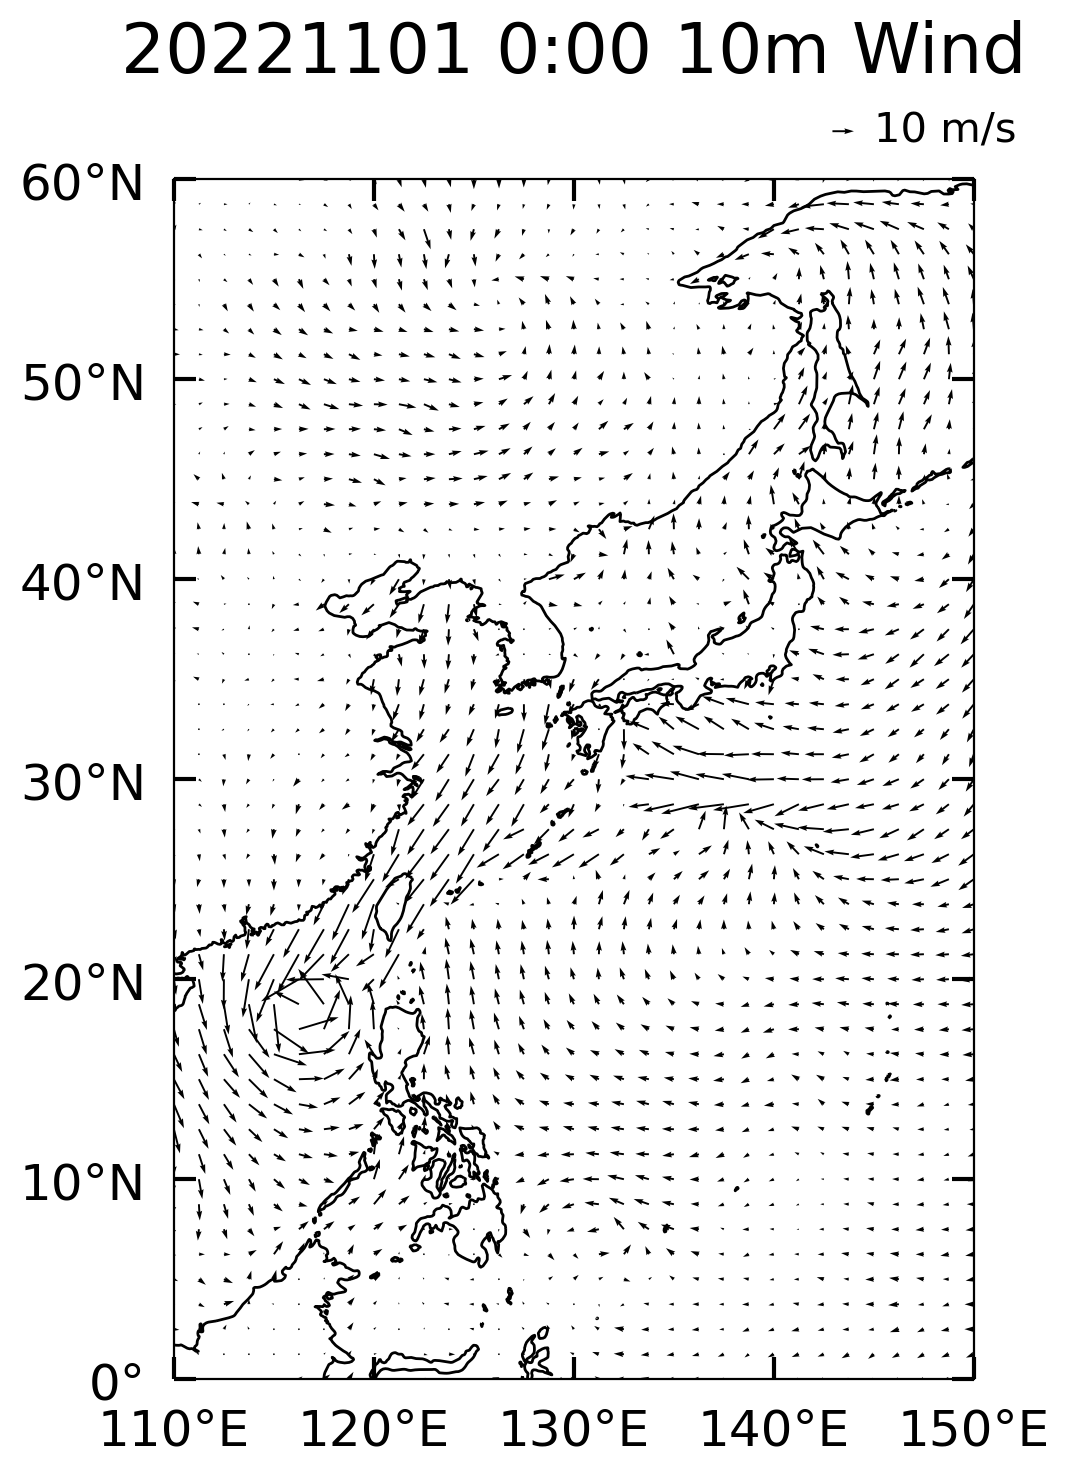

In [5]:
#【图2】0-40N，110E-150E区域区域2022年11月1日0时风场图
#画图网格
X,Y = np.meshgrid(lon,lat)

#figure和ax设置
fig = plt.figure(figsize=(6,8),dpi=200)
proj = ccrs.PlateCarree()
region=[110,150,0,60]
ax = plt.axes([0.125,0,0.75,0.75],projection=proj)
ax.set_extent(region,crs = proj)  #设置区域与需要画图的区域范围一致
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))  #海岸线

#风场图（调整间距）
u0 = u[0,:,:]  #取0时刻的u,v风速
v0 = v[0,:,:]
q = ax.quiver(X[::5,::5],Y[::5,::5],u0[::5,::5],v0[::5,::5],color='k')  
#箭头（q，位置左右，位置上下，要显示的风速（10m/s）,label，label在箭头右侧，以axes为坐标系，字体大小）
ax.quiverkey(q, 0.85, 1.04, 10, '10 m/s', labelpos='E',coordinates='axes',fontproperties={'size':15})

#刻度设置
ax.set_xticks(np.arange(110,160,10))  #指定要显示的经纬度
ax.set_yticks(np.arange(0,70,10))
ax.xaxis.set_major_formatter(LongitudeFormatter())  #刻度格式转换为经纬度样式
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(axis='x',top=True,which='major',direction='in',length=8,width=1.5,labelsize=18,pad=10)  #刻度样式
ax.tick_params(axis='y',right=True,which='major',direction='in',length=8,width=1.5,labelsize=18,pad=10)

#标题
plt.suptitle('20221101 0:00 10m Wind',fontsize=25,y=0.85)
plt.savefig('C:/Users/LULU/Desktop/wind_fig2.jpg',bbox_inches = 'tight')  #完整保存图片
plt.show()

In [6]:
#计算风速风向
def transUV(data_u,data_v):
    speeduv = (data_u**2+data_v**2)**0.5
    diruv = np.arctan(abs(data_u)/abs(data_v))
    diruv = (diruv/np.pi)*180
    if data_v>0:
        if data_u>0:
            diruv = diruv
        else:
            diruv = 270+diruv
    else:
        if data_u>0:
            diruv = diruv+90
        else:
            diruv = diruv+180
    out = (speeduv,diruv)
    return out

In [7]:
#提取数据
u1 = u[:,120,40]  #u的三个维度分别为time,lat,lon
v1 = v[:,120,40]  #u的三个维度分别为time,lat,lon

#循环计算风速风向
speeds = []
dirs = []
for i in range(len(u1)):
    out1 = transUV(u1[i],v1[i])
    speeds.append(out1[0])
    dirs.append(out1[1])

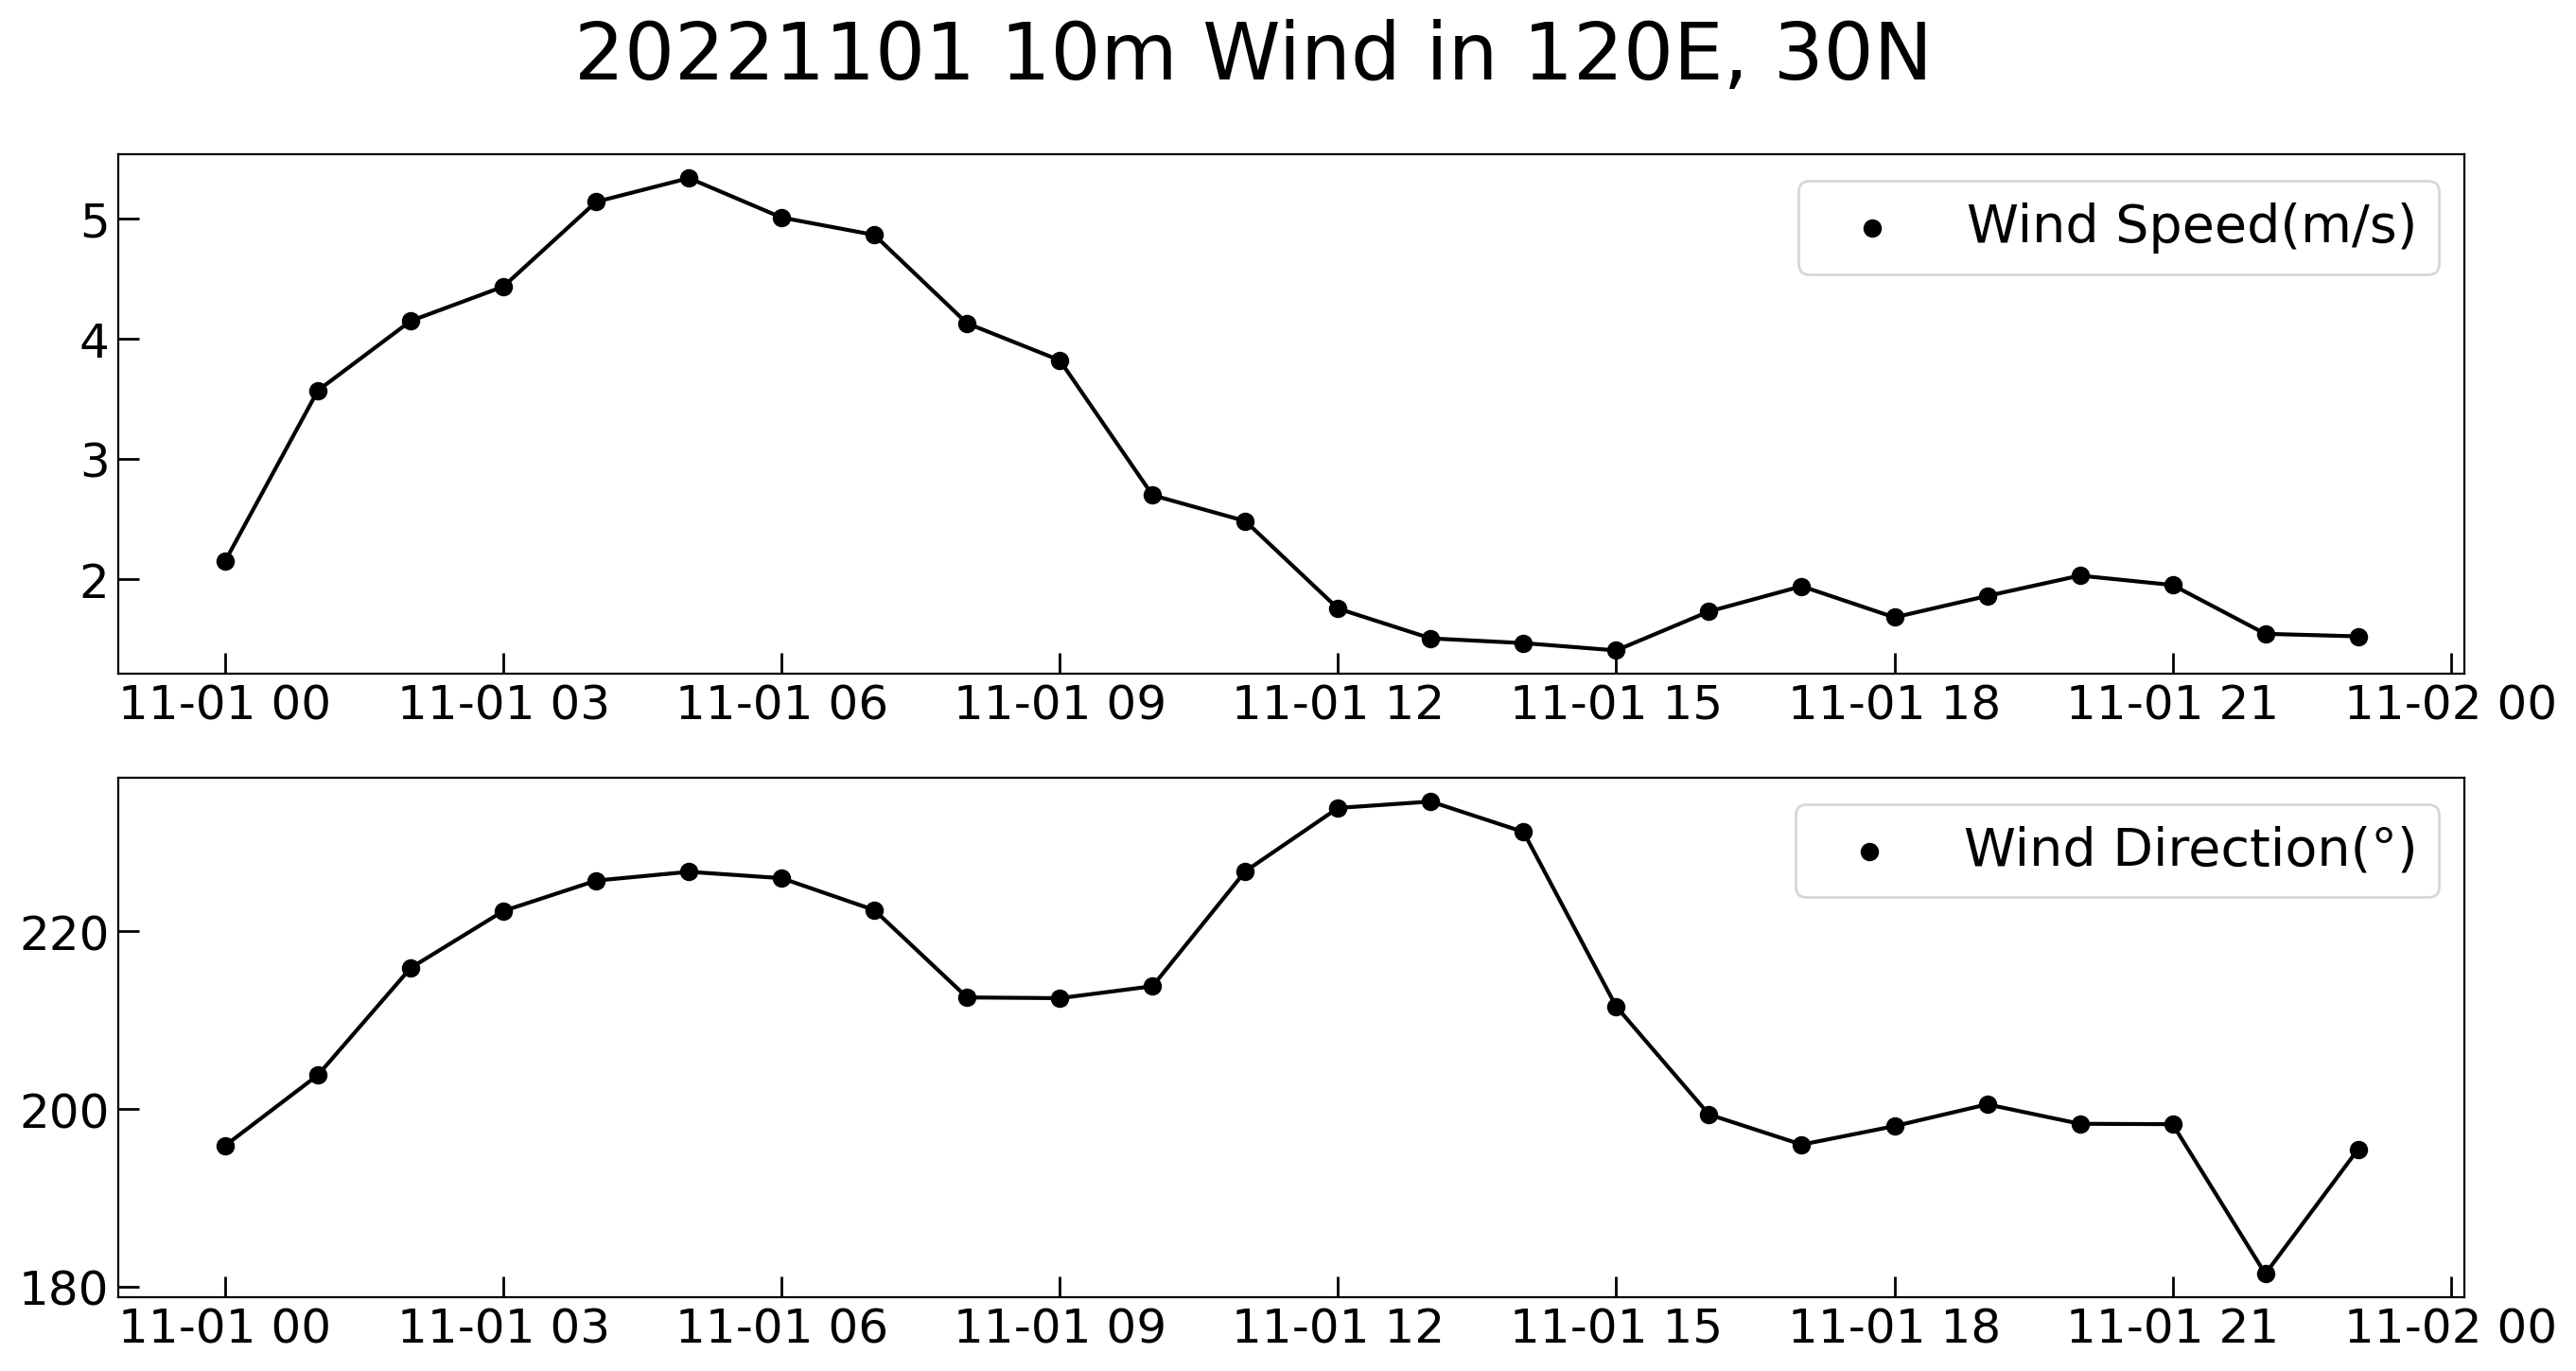

In [8]:
#【图3】使用u、v分量计算120E,30N处的风向和风速，并绘制时间序列图
fig = plt.figure(figsize=(16,8),dpi=200)
ax1 = fig.add_subplot(211)
ax1.plot(time,speeds,c='k')
ax1.scatter(time,speeds,c='k',label='Wind Speed(m/s)')
ax1.legend(loc=1,fontsize=20)
ax1.tick_params(axis='x',which='major',direction='in',length=8,width=1,labelsize=18)
ax1.tick_params(axis='y',which='major',direction='in',length=8,width=1,labelsize=18)

ax2 = fig.add_subplot(212)
ax2.plot(time,dirs,c='k')
ax2.scatter(time,dirs,c='k',label='Wind Direction(°)')
ax2.legend(loc=1,fontsize=20)
ax2.tick_params(axis='x',which='major',direction='in',length=8,width=1,labelsize=18)
ax2.tick_params(axis='y',which='major',direction='in',length=8,width=1,labelsize=18)

#标题
plt.suptitle('20221101 10m Wind in 120E, 30N',fontsize=30,y=0.97)
plt.savefig('C:/Users/LULU/Desktop/wind_fig3.jpg',bbox_inches = 'tight')  #完整保存图片
plt.show()